In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Loading the data

In [2]:
df = pd.read_csv('data.csv')
# inputs = gap, speed, lead speed
# output = acceleration
inputs = df.iloc[:, 1:4].values
output = df.iloc[:, 4].values

In [3]:
print(inputs)

[[ 0.          0.          0.        ]
 [16.49585283  2.53829175 12.43940968]
 [24.31982909  3.04930868  1.26702903]
 ...
 [24.99147509 22.31983849  9.59825696]
 [35.49263862 28.06505694 33.21846164]
 [13.19718427 24.2861917  14.25926874]]


In [4]:
print(output)

[  0.           0.98524898   0.91058088 ... -30.79518347   0.23091303
 -90.15209714]


In [5]:
print(df.head())

# check acceleration values with Yashar
print(df[df['acceleration']<-10000].head())

   Unnamed: 0        gap      speed  lead_speed  acceleration  new_speed  \
0           0   0.000000   0.000000    0.000000      0.000000   0.000000   
1           1  16.495853   2.538292   12.439410      0.985249   2.636817   
2           2  24.319829   3.049309    1.267029      0.910581   3.140367   
3           3   3.451395  11.844214   26.573875      0.639911  11.908205   
4           4  47.824531  15.410674   12.011722      0.272340  15.437908   

    delta_x  
0  0.000000  
1  0.258755  
2  0.309484  
3  1.187621  
4  1.542429  
     Unnamed: 0       gap      speed  lead_speed  acceleration    new_speed  \
61           61  3.806773  31.915501    1.125740 -13063.269510 -1274.411450   
128         128  3.125254  32.199805    5.378393 -15316.840137 -1499.484209   
225         225  2.336744  32.579616    4.457591 -30578.743886 -3025.294773   
334         334  2.459953  31.819590   12.739084 -13112.037125 -1279.384122   
764         764  2.224509  31.039152    3.263967 -29953.637865 -

# Linear regression

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(inputs,output)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Polynomial regression using kernel and linear regression

### To do: understand how the polynomial transform works. On some rows, reproduce input_augmented from input. (if possible for degree = 4)

In [7]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
input_augmented = poly_reg.fit_transform(inputs)
# poly_reg.fit(input_augmented, output)

lin_reg2 = LinearRegression()
lin_reg2.fit(input_augmented,output)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
print(input_augmented.shape)
print(poly_reg.get_params())

(3000000, 35)
{'degree': 4, 'include_bias': True, 'interaction_only': False, 'order': 'C'}


In [9]:
print(lin_reg2.coef_)

[-2.96967012e-09  3.74953253e+02 -9.20186014e+01  8.09118238e+01
 -2.85719076e+01  2.09853442e+01 -1.69779932e+01 -6.05561401e+00
  6.74123780e+00 -1.34861473e+00  7.82988591e-01 -9.89422186e-01
  7.71501609e-01  6.40512244e-01 -7.74690850e-01  2.14306370e-01
 -1.86967636e-01  3.07246760e-01 -1.26104161e-01 -7.78552120e-03
 -7.02698905e-03  1.23857902e-02 -9.48350813e-03 -1.17947790e-02
  1.51038322e-02 -4.70422058e-03  6.16588288e-03 -1.15731445e-02
  5.84367706e-03 -2.44086036e-04 -1.38417984e-03  3.53731864e-03
 -2.20065928e-03 -1.32796031e-04  2.76768109e-04]


In [10]:
help(PolynomialFeatures)

Help on class PolynomialFeatures in module sklearn.preprocessing.data:

class PolynomialFeatures(sklearn.base.BaseEstimator, sklearn.base.TransformerMixin)
 |  PolynomialFeatures(degree=2, interaction_only=False, include_bias=True, order='C')
 |  
 |  Generate polynomial and interaction features.
 |  
 |  Generate a new feature matrix consisting of all polynomial combinations
 |  of the features with degree less than or equal to the specified degree.
 |  For example, if an input sample is two dimensional and of the form
 |  [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2].
 |  
 |  Parameters
 |  ----------
 |  degree : integer
 |      The degree of the polynomial features. Default = 2.
 |  
 |  interaction_only : boolean, default = False
 |      If true, only interaction features are produced: features that are
 |      products of at most ``degree`` *distinct* input features (so not
 |      ``x[1] ** 2``, ``x[0] * x[2] ** 3``, etc.).
 |  
 |  include_bias : boolean

In [11]:
n = inputs.shape[0]
print(n)
batch = np.random.choice(n, 100)
print(batch)

3000000
[2057283  770952 2253086 1063261  951530 1632481 2965419 1726513 1495767
 1156289  620715  432841 2495690 1064077 2819715 2304654 2329351 2482855
  801292 2947074  982382  308339 1842054 2753138 2684224   89931 1805259
 1022642  949015 1989372 2028055  485003 1405746  688082  639576 2198252
  992846 2717237 1913010  916959 1796476 2408728   52538 1979945 1883912
   74309 1011572 2625160 1951565  364579  680012 2289497 2197095 2551673
 1857757 2883814 2519283 2906793 1470299   41724 1850769 1013734 2968360
  157657 1026181 2107578 1878244  492651  390656 2810282 2017017 1946412
  729099   62014 2864208 2140088  286672 2864807 2047011 2240754 1184557
 2815625 2664748  944065 1605274 2597545 2094373 1311431 1229704  662518
 1971429  304137   35056 1022765 1918873  792959 1563416 1250693  873244
 1044727]


In [12]:
print(inputs[batch][:,0].shape)
print(output[batch])

(100,)
[ 9.85275054e-01  9.15150509e-01  7.26647145e-01 -2.01135065e+01
 -1.67219601e+01  9.62210852e-01  8.51064607e-01 -4.13209616e+01
 -5.41662775e+00 -8.29507527e-02  8.56089317e-01 -2.06731636e+01
  9.95398677e-01 -4.92587082e+01 -1.65718374e+02 -2.37824718e+01
 -1.36131285e+00 -2.09599320e+01 -3.11141193e+01  7.91955621e-01
 -1.13347510e+01 -5.68313885e+00  6.17048131e-01 -5.47673883e+01
 -2.52687451e+02 -3.96103985e+02  9.83875375e-01 -2.95190964e+01
  9.86626287e-01 -6.66987918e+00 -7.22790485e+03 -6.00242168e+01
 -2.05471672e+01  8.84476718e-01 -3.86264021e+01 -3.47094403e+01
  9.70807987e-01 -8.55556179e+00 -2.12583964e+01 -6.98886981e+00
  7.08910090e-01 -6.68529456e+01 -7.38288151e-01  5.67190157e-01
 -4.63526338e+02  1.11721971e-01 -3.15939873e+02 -2.95059755e-01
 -4.95649590e+01  9.45034835e-01  8.22655828e-01 -2.07384853e+01
 -1.73695633e+00 -2.70995985e+01 -2.13053977e+02  9.89655401e-01
 -6.20853084e+01 -7.43191589e+00 -2.10541626e-01 -2.96114280e+03
 -4.59357915e+01  

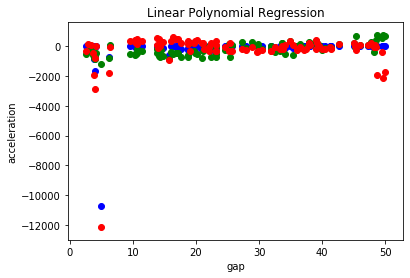

Absolute error for linear regression:
2064264.2708748104
Absolute error for linear polynomial regression:
1294442.8600765418


In [12]:
# Linear
plt.scatter(inputs[batch][:,0], output[batch], color = 'blue') 


plt.scatter(inputs[batch][:,0], lin_reg.predict(inputs[batch]), color = 'green') 
plt.scatter(inputs[batch][:,0], lin_reg2.predict(input_augmented[batch]), color = 'red') 
plt.title('Linear Polynomial Regression') 
plt.xlabel('gap') 
plt.ylabel('acceleration') 
  
plt.show() 
print("Absolute error for linear regression:")
print(np.linalg.norm(output- lin_reg.predict(inputs)))

print("Absolute error for linear polynomial regression:")
print(np.linalg.norm(output - lin_reg2.predict(input_augmented)))

In [13]:
print(lin_reg2.coef_)
print(help(lin_reg2))



[-2.96967012e-09  3.74953253e+02 -9.20186014e+01  8.09118238e+01
 -2.85719076e+01  2.09853442e+01 -1.69779932e+01 -6.05561401e+00
  6.74123780e+00 -1.34861473e+00  7.82988591e-01 -9.89422186e-01
  7.71501609e-01  6.40512244e-01 -7.74690850e-01  2.14306370e-01
 -1.86967636e-01  3.07246760e-01 -1.26104161e-01 -7.78552120e-03
 -7.02698905e-03  1.23857902e-02 -9.48350813e-03 -1.17947790e-02
  1.51038322e-02 -4.70422058e-03  6.16588288e-03 -1.15731445e-02
  5.84367706e-03 -2.44086036e-04 -1.38417984e-03  3.53731864e-03
 -2.20065928e-03 -1.32796031e-04  2.76768110e-04]
Help on LinearRegression in module sklearn.linear_model.base object:

class LinearRegression(LinearModel, sklearn.base.RegressorMixin, sklearn.base.MultiOutputMixin)
 |  LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=None)
 |  
 |  Ordinary least squares Linear Regression.
 |  
 |  Parameters
 |  ----------
 |  fit_intercept : boolean, optional, default True
 |      whether to calculate the intercept

In [14]:
plt.scatter(x, y, color = 'blue') 
  
plt.plot(x, lin_reg2.predict(poly_reg.fit_transform(x)), color = 'red') 
plt.title('Polynomial Regression') 
plt.xlabel('gap') 
plt.ylabel('speed') 
  
plt.show()

NameError: name 'x' is not defined

### To do: have a list of other regression techniques we can do.

### To do: using the code for neural network, add the neural network technique here

In [42]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

def sigmoid_derivative(x):
    s = sigmoid(x)
    ds = s*(1-s)
    return ds

nb_weights = 100

class neural:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],nb_weights) 
        self.weights2   = np.random.rand(nb_weights,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))
    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2

In [43]:
x = df[['gap', 'speed', 'lead_speed']].to_numpy()
y = df[['acceleration']].to_numpy()
n = neural(x, y)

In [44]:
print(df.head())
print()

   Unnamed: 0        gap      speed  lead_speed  acceleration  new_speed  \
0           0   0.000000   0.000000    0.000000      0.000000   0.000000   
1           1  16.495853   2.538292   12.439410      0.985249   2.636817   
2           2  24.319829   3.049309    1.267029      0.910581   3.140367   
3           3   3.451395  11.844214   26.573875      0.639911  11.908205   
4           4  47.824531  15.410674   12.011722      0.272340  15.437908   

    delta_x  
0  0.000000  
1  0.258755  
2  0.309484  
3  1.187621  
4  1.542429  



In [45]:
for i in range(10):
#     if i%10==0:
    print(i)
    n.feedforward()
    n.backprop()

0
1
2
3
4
5
6
7
8
9


In [48]:
print("Absolute error for neural network:")
print(np.linalg.norm(y - n.output))

Absolute error for neural network:
2183911.6558572417


In [13]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import pandas as pd


In [14]:
df = pd.read_csv('data.csv')
# inputs = gap, speed, lead speed
# output = acceleration
inputs = df.iloc[:, 1:4].values
output = df.iloc[:, 4].values

In [27]:
model = Sequential()
model.add(Dense(32, input_dim=3, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))


In [30]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error', 'MAE'])


In [31]:
model.fit(inputs, output, epochs=10, batch_size=1000)


Train on 3000000 samples
Epoch 1/10
3000000/3000000 [==============================] - 12s 4us/sample - loss: 4231.0585 - mean_squared_error: 4231.0527 - MAE: 18.0914
Epoch 2/10
3000000/3000000 [==============================] - 12s 4us/sample - loss: 3480.7784 - mean_squared_error: 3480.7761 - MAE: 16.2855
Epoch 3/10
3000000/3000000 [==============================] - 12s 4us/sample - loss: 2988.0755 - mean_squared_error: 2988.0732 - MAE: 15.0980
Epoch 4/10
3000000/3000000 [==============================] - 13s 4us/sample - loss: 2476.2759 - mean_squared_error: 2476.2722 - MAE: 14.0142
Epoch 5/10
3000000/3000000 [==============================] - 12s 4us/sample - loss: 2015.6771 - mean_squared_error: 2015.6772 - MAE: 13.0680 - ETA: 5s - loss: 2098.4606 - mean_squared_error: - - ETA: 0s - loss: 2036.9589 - mean_squared_error: 2036.9594 - MA
Epoch 6/10
3000000/3000000 [==============================] - 14s 5us/sample - loss: 1624.1902 - mean_squared_error: 1624.1892 - MAE: 12.0140
Epoch 

In [ ]:
_, accuracy = model.evaluate(inputs, output)
print('Accuracy: %.2f' % (accuracy*100))

In [17]:
model.fit(inputs, output, epochs=10, batch_size=10000)


Train on 3000000 samples
Epoch 1/10
3000000/3000000 [==============================] - 2s 1us/sample - loss: -11911.2537 - accuracy: 3.3333e-07
Epoch 2/10
3000000/3000000 [==============================] - 1s 0us/sample - loss: -103007.2598 - accuracy: 3.3333e-07
Epoch 3/10
3000000/3000000 [==============================] - 1s 0us/sample - loss: -433472.1084 - accuracy: 3.3333e-07
Epoch 4/10
3000000/3000000 [==============================] - 1s 0us/sample - loss: -1153734.0869 - accuracy: 3.3333e-07
Epoch 5/10
3000000/3000000 [==============================] - 1s 0us/sample - loss: -2338749.2946 - accuracy: 3.3333e-07
Epoch 6/10
3000000/3000000 [==============================] - 1s 0us/sample - loss: -4046378.3342 - accuracy: 3.3333e-07
Epoch 7/10
3000000/3000000 [==============================] - 1s 0us/sample - loss: -6324141.9600 - accuracy: 3.3333e-07
Epoch 8/10
3000000/3000000 [==============================] - 1s 0us/sample - loss: -9207945.8650 - accuracy: 3.3333e-07
Epoch 9/10


In [18]:
_, accuracy = model.evaluate(inputs, output)
print('Accuracy: %.2f' % (accuracy*100))

3000000/3000000 [==============================] - 104s 35us/sample - loss: -19239875.1145 - accuracy: 3.3333e-07
Accuracy: 0.00


In [19]:
model.fit(inputs, output, epochs=100, batch_size=100)


Train on 3000000 samples
Epoch 1/100
3000000/3000000 [==============================] - 54s 18us/sample - loss: -1539575950.3244 - accuracy: 3.3333e-07 - los
Epoch 2/100
3000000/3000000 [==============================] - 75s 25us/sample - loss: -14346448536.0768 - accuracy: 3.3333e-07
Epoch 3/100
3000000/3000000 [==============================] - 40s 13us/sample - loss: -51535785135.6117 - accuracy: 3.3333e-07
Epoch 4/100
3000000/3000000 [==============================] - 41s 14us/sample - loss: -126134454220.8683 - accuracy: 3.3333e-07
Epoch 5/100
3000000/3000000 [==============================] - 43s 14us/sample - loss: -250660446341.3931 - accuracy: 3.3333e-07
Epoch 6/100
3000000/3000000 [==============================] - 43s 14us/sample - loss: -437091542570.8032 - accuracy: 3.3333e-07
Epoch 7/100
3000000/3000000 [==============================] - 46s 15us/sample - loss: -700118801877.8113 - accuracy: 3.3333e-07
Epoch 8/100
3000000/3000000 [==============================] - 39s 13u

KeyboardInterrupt: 